In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
import datetime

In [2]:
data = load_breast_cancer()

In [3]:
X=data.data
y=data.target

In [4]:
X.shape

(569, 30)

In [5]:
np.unique(y)

array([0, 1])

In [6]:
X_dr = PCA(2).fit_transform(X)

In [7]:
X_dr.shape

(569, 2)

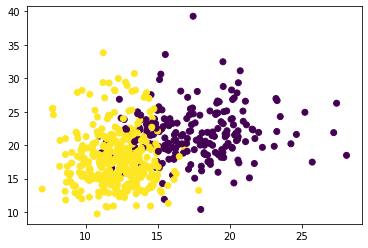

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [9]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [10]:
Kernel = ["linear","poly","rbf","sigmoid"]

In [11]:
# for kernel in Kernel:
#     time0 = time()
#     clf = SVC(kernel=kernel, gamma="auto"
#                 # ,degree = 1多项式核函数次数为1为线性，不为1为非线性，默认为3
#               , cache_size=5000  # 分配给SVC的内存大小单位MB，默认200MB
#               ).fit(Xtrain, Ytrain)
#     print("The accuracy under kernel %s is %f" % (kernel, clf.score(Xtest, Ytest)))
#     print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
# 若degree默认为3则运行时间过长，卡在多项式核函数

In [14]:
Kernel = ["linear","rbf","sigmoid"]

In [15]:
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel, gamma="auto"
                # ,degree = 1多项式核函数次数为1为线性，不为1为非线性，默认为3
              , cache_size=5000  # 分配给SVC的内存大小单位MB，默认200MB
              ).fit(Xtrain, Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    #由运行结果可知线性核在此数据集上效果较好，由此猜测此数据集为线性数据集

The accuracy under kernel linear is 0.929825
00:00:497246
The accuracy under kernel rbf is 0.596491
00:00:048368
The accuracy under kernel sigmoid is 0.596491
00:00:005682


In [16]:
Kernel = ["linear","poly","rbf","sigmoid"]

In [17]:
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel, gamma="auto"
              , degree=1  # 多项式核函数次数为1为线性，不为1为非线性，默认为3
              , cache_size=5000  # 分配给SVC的内存大小单位MB，默认200MB
              ).fit(Xtrain, Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    # 多项式核函数在dgree=1时运行效果较优，且运行时间比线性核函数快很多

The accuracy under kernel linear is 0.929825
00:00:482507
The accuracy under kernel poly is 0.923977
00:00:093276
The accuracy under kernel rbf is 0.596491
00:00:049491
The accuracy under kernel sigmoid is 0.596491
00:00:005016


In [25]:
data = pd.DataFrame(X)
# data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T
# 量纲不统一
# 偏态问题

In [26]:
X = StandardScaler().fit_transform(X)
# 将数据转化为在0到1之间的正态分布
data = pd.DataFrame(X)
# data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

In [23]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ["linear","poly","rbf","sigmoid"]

In [24]:
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel, gamma="auto"
              , degree=1  # 多项式核函数次数为1为线性，不为1为非线性，默认为3
              , cache_size=5000  # 分配给SVC的内存大小单位MB，默认200MB
              ).fit(Xtrain, Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    # 数据标准化后，四种核函数的运行效果和时间都得到了提升

The accuracy under kernel linear is 0.976608
00:00:014910
The accuracy under kernel poly is 0.964912
00:00:006068
The accuracy under kernel rbf is 0.970760
00:00:010717
The accuracy under kernel sigmoid is 0.953216
00:00:004296


经过上面的实验，可以得出的结论有：
**1.多项式核函数在高次项时计算非常缓慢**
**2.rbf和sigmoid核函数在量纲不统一的数据集上运行效果较差**
**3.SVM在执行之前应该先进行数据的标准化处理**

In [27]:
gamama_range = np.logspace(-10, 1, 50)  # 返回在对数刻度上均匀间隔的数字

0.9766081871345029 0.012067926406393264


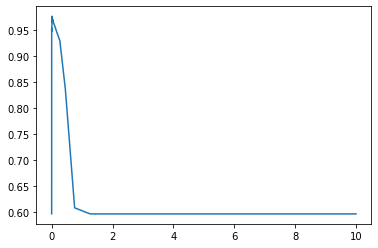

In [28]:
score = []
for i in gamama_range:
    clf = SVC(kernel="rbf", gamma=i, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))
print(max(score), gamama_range[score.index(max(score))])
plt.plot(gamama_range, score)
plt.show()

In [31]:
time0 = time()

gamama_range = np.logspace(-10, 1, 50)
coef0_range = np.linspace(0, 5, 10)

param_grid = dict(gamma=gamama_range, coef0=coef0_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel="poly", degree=1, cache_size=5000), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))


The best parameters are {'coef0': 0.0, 'gamma': 0.09540954763499924} with a score of 0.96959
00:17:590604
